In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import cv2

In [3]:
DATADIR = ("input/uisketch")
CATEGORIES = ['button', 'card','image']

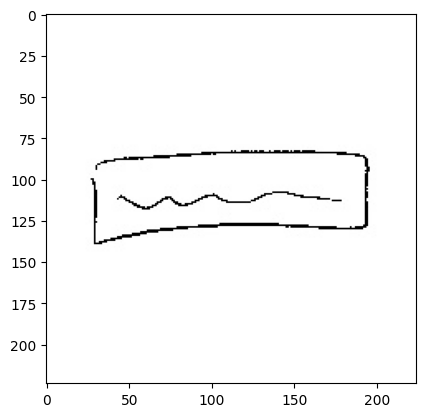

In [4]:
for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        plt.imshow(img_array)
        plt.show()
        break
    break 

In [5]:
print(img_array.shape)

(224, 224, 3)


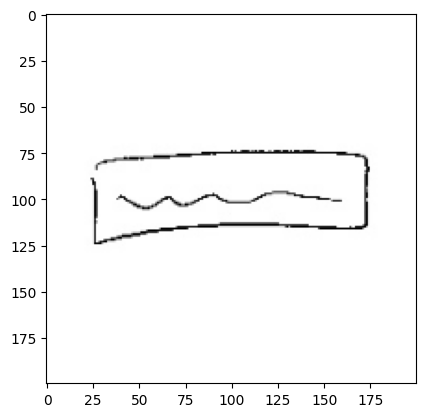

In [6]:
IMG_SIZE = 200
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array)
plt.show()

In [7]:
training_data = []

def create_training_data():
    for i in range(len(CATEGORIES)):
        category = CATEGORIES[i]
        path = os.path.join(DATADIR, category)
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path,img))
            new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
       
            training_data.append([new_array, i])

create_training_data()
len(training_data)

3248

In [8]:

count_button = 0
count_card = 0 
count_image = 0
for image in training_data:
    if image[1] == 0:
        count_button += 1
    elif  image[1] == 1:
         count_card +=1
    else :
        count_image +=1
print('Button:', count_button, 'Card:', count_card,' Image',count_image)

Button: 1157 Card: 972  Image 1119


In [9]:
import pandas as pd
df = pd.DataFrame(training_data)

In [10]:
df.columns=['Image Pixel Value','Output']
df.head()

,Image Pixel Value,Output
0,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",0
1,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",0
2,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",0
3,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",0
4,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",0


In [11]:
from skimage.filters.rank import entropy
from skimage.morphology import disk
greyscale_img_list = []
for image in df.index:
    # entropy_img = entropy(df['Image Pixel Value'][image],disk(3))
    # entropy_img_list.append(entropy_img)
    final_array = cv2.cvtColor(df['Image Pixel Value'][image],cv2.COLOR_BGR2GRAY)
    greyscale_img_list.append(final_array)

len(greyscale_img_list)


3248

In [12]:
df=df.assign(GreyScale = greyscale_img_list)

df.head()


,Image Pixel Value,Output,GreyScale
0,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",0,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,..."
1,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",0,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,..."
2,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",0,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,..."
3,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",0,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,..."
4,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",0,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,..."


In [13]:
from skimage.filters.rank import entropy
from skimage.morphology import disk
entropy_img_list = []
for image in df.index:
    entropy_img = entropy(df['GreyScale'][image],disk(1))
    entropy_img_list.append(entropy_img)



In [14]:
df=df.assign(Entropy = entropy_img_list)

df.head()

,Image Pixel Value,Output,GreyScale,Entropy
0,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",0,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
1,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",0,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
2,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",0,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
3,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",0,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
4,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",0,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."


In [15]:
from skimage.filters import sobel
sobel_img_list = []
for image in df.index:
    sobel_img = sobel(df['GreyScale'][image])
    sobel_img_list.append(sobel_img)


In [16]:
df=df.assign(Sobel = sobel_img_list)

df.head()

,Image Pixel Value,Output,GreyScale,Entropy,Sobel
0,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",0,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
1,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",0,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
2,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",0,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
3,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",0,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
4,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",0,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."


In [17]:
from scipy import ndimage as nd
gaussian_img_list = []
for image in df.index:
    gaussian_img = nd.gaussian_filter(df['GreyScale'][image],sigma=3)
    gaussian_img_list.append(entropy_img)


In [18]:
df=df.assign(Gaussian = gaussian_img_list)

df.head()

,Image Pixel Value,Output,GreyScale,Entropy,Sobel,Gaussian
0,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",0,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
1,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",0,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
2,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",0,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
3,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",0,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
4,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",0,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."


In [19]:
df = df.sample(frac = 1)
df.head()


,Image Pixel Value,Output,GreyScale,Entropy,Sobel,Gaussian
2485,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",2,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
106,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",0,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
2908,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",2,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
1674,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",1,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
1459,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",1,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."


In [32]:

x = df[['GreyScale','Entropy','Sobel','Gaussian']]
y = df['Output']


In [33]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20)

In [41]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

In [59]:
training_data.append(greyscale_img_list)
training_data.append(entropy_img_list)
training_data.append(sobel_img_list)
training_data.append(gaussian_img_list)



[array([[[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        ...,
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
  

In [69]:
y = np.array(y)
X = x/225.0
model = Sequential()
model.add(Conv2D(64, (3,3), input_shape = training_data))
model.add(Activation("relu")) 
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (3,3)))
model.add(Activation("relu")) #rectified linear
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(64))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy',
                optimizer="adam",
                metrics=['accuracy'])
model.fit(X, y, batch_size=32, epochs=3, validation_split=0.2)